In [1]:
import numpy as np
import matplotlib.pyplot as plt

0.9931278515084836 -0.02925302402765811


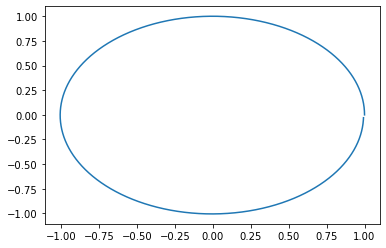

In [93]:
t_total = 1 #1 year
N = 10000
G = 4*np.pi**2

dt = t_total / N

t = np.arange(0,t_total,dt)

alpha = 0.001

x = np.zeros(t.size)
y = np.zeros(t.size)
vx = np.zeros(t.size)
vy = np.zeros(t.size)

x[0] = 1 #Au, where Au is the average distance from the sun to earth
y[0] = 0 #Au
vx[0] = 0
vy[0] = (2*np.pi) #The distance we want to cover is 2pi and since it takes 1 Au to go 2pi, our intial velocity in y is just 2pi

for i in np.arange(t.size - 1):
    r = np.sqrt(x[i]**2 + y[i]**2)
    v = np.sqrt(vx[i]**2 + vy[i]**2)
    if vx[i+1] <= 0:
         vx[i+1] = vx[i] - (G*x[i]/r**3)*dt + alpha*vx[i]*v*dt
    if vx[i+1] > 0:
        vx[i+1] = vx[i] - (G*x[i]/r**3)*dt - alpha*vx[i]*v*dt
    x[i+1] = x[i] + vx[i+1]*dt
    
    if vy[i+1] <= 0:
        vy[i+1] = vy[i] - ((G*y[i]/r**3) - alpha*vy[i]*v)
    if vy[i+1] > 0:
        vy[i+1] = vy[i] - ((G*y[i]/r**3) + alpha*vy[i]*v)

    y[i+1] = y[i] + vy[i+1]*dt

print(x[t.size-1],y[t.size-1])
plt.plot(x,y)